# Section 3.3.1 Logistic Regression Heart Disease Example

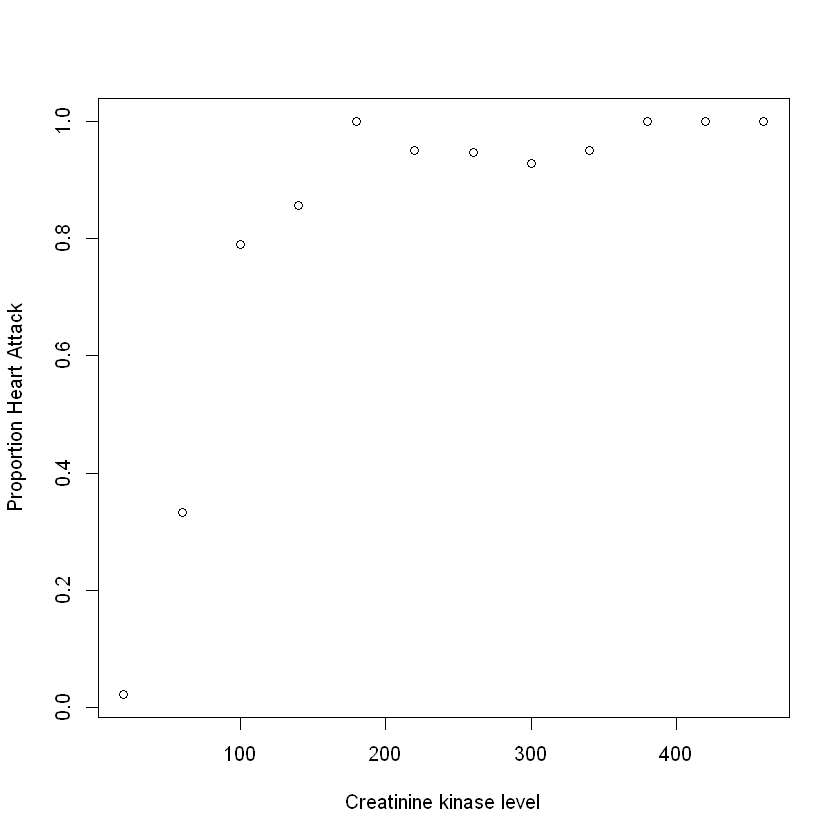

In [5]:
# load data and plot

library(gamair)
heart <- data.frame(ck = 0:11*40+20,
ha=c(2,13,30,30,21,19,18,13,19,15,7,8),
ok=c(88,26,8,5,0,1,1,1,1,0,0,0))

p <- heart$ha/(heart$ha+heart$ok)
plot(heart$ck,p,xlab="Creatinine kinase level",
ylab="Proportion Heart Attack")


In [6]:
# both notations are the same, because the canonical link function for binomial is logit anyway
mod.0 <- glm(cbind(ha,ok) ~ ck, family=binomial(link=logit),
data=heart)
mod.0 <- glm(cbind(ha,ok) ~ ck, family=binomial,
data=heart)
# print
mod.0



Call:  glm(formula = cbind(ha, ok) ~ ck, family = binomial, data = heart)

Coefficients:
(Intercept)           ck  
   -2.75836      0.03124  

Degrees of Freedom: 11 Total (i.e. Null);  10 Residual
Null Deviance:	    271.7 
Residual Deviance: 36.93 	AIC: 62.33

**The null deviance is the deviance for a model with just the constant term, while the residual deviance is the deviance of the fitted model. The null and residual deviance can be combined to give the proportion deviance explained, a generalization of r^2.**

In [7]:
(271.7-36.93)/271.7

[1] 0.864078

In [8]:
1-pchisq(36.93, 10)

[1] 5.819325e-05

**This shows a very small probability that a chi square random variable with df 10 being as large as 36.93. The residual plots below also show a poor fit**

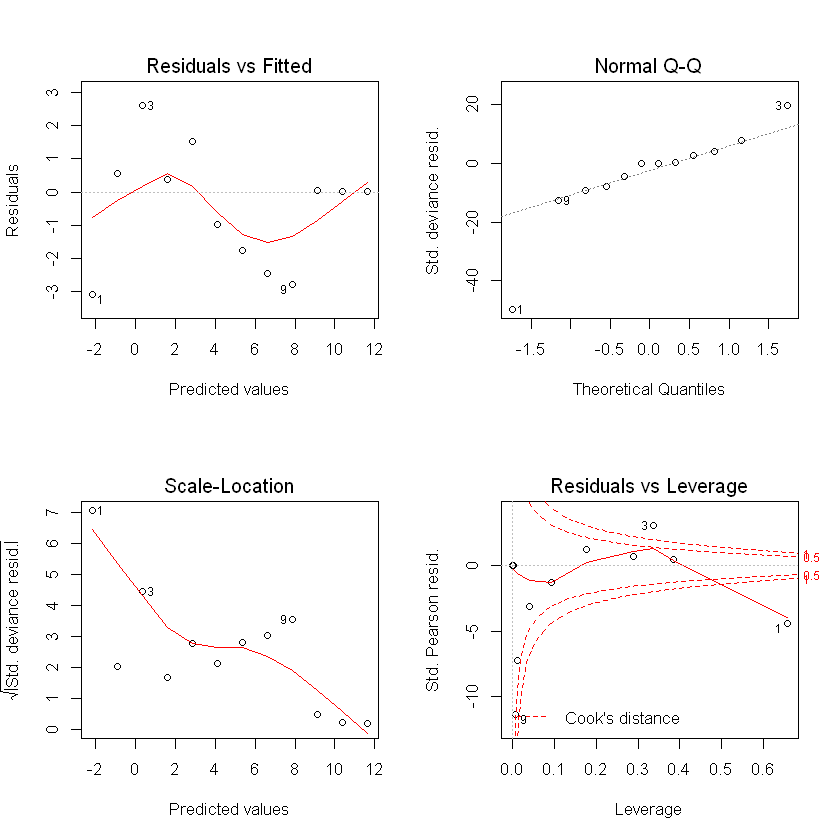

In [11]:
par(mfrow=c(2, 2))
plot(mod.0)

**The plots have the same interpretation as the plots for ordinary linear regression. Except now it is the deviance residuals that are plotted, the predicted values are on the scale of the linear predictor and not the response, and there is some departure from the straight line relationship in the normal Q-Q plot is often to be expected. While the data is sparse making it harder to interpret, we can see that there is a trend in the mean of the residuals plotted against the fitted values, which is concerning. Also, the first point has very high influence. It is an important realization that interpreting these graphs would be much harder if not impossible with binary data (which is why the link function is necessary).**

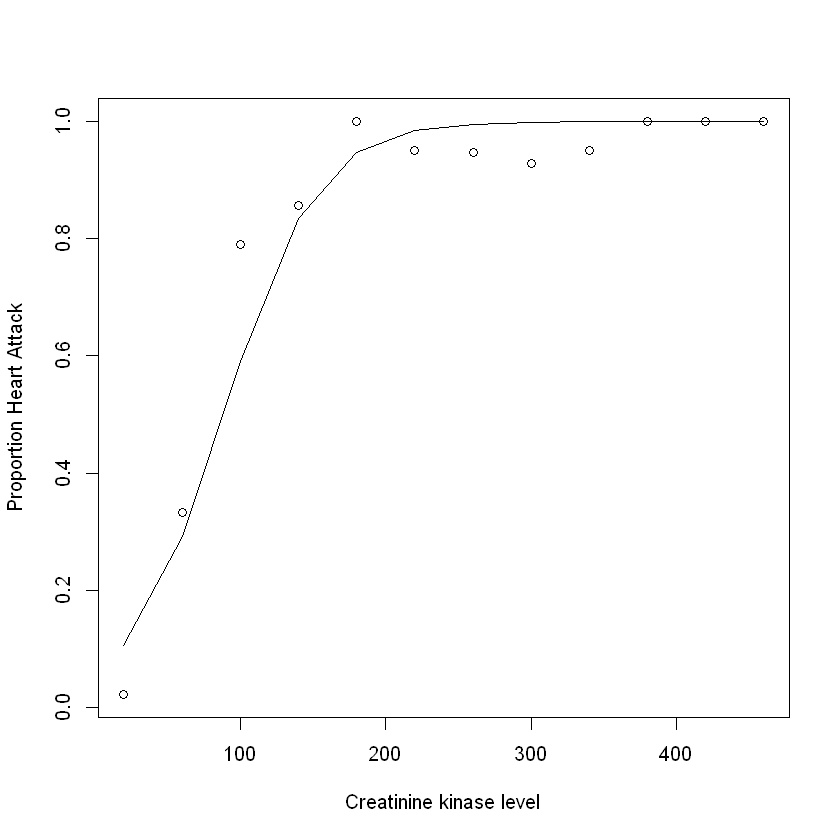

In [12]:
plot(heart$ck, p, xlab="Creatinine kinase level",
ylab="Proportion Heart Attack")
lines(heart$ck, fitted(mod.0))

**Problems do not stand out so clearly from the above plot of the fitted values overlaid on the raw estimated probabilities.**

**The residual plots suggest a cubic linear predictor, rather than the initial straight line.**

In [13]:
mod.2 <- glm(cbind(ha,ok)~ck+I(ck^2)+I(ck^3),family=binomial,
data=heart)
mod.2


Call:  glm(formula = cbind(ha, ok) ~ ck + I(ck^2) + I(ck^3), family = binomial, 
    data = heart)

Coefficients:
(Intercept)           ck      I(ck^2)      I(ck^3)  
 -5.786e+00    1.102e-01   -4.649e-04    6.448e-07  

Degrees of Freedom: 11 Total (i.e. Null);  8 Residual
Null Deviance:	    271.7 
Residual Deviance: 4.252 	AIC: 33.66

**The residual plots suggest a cubic linear predictor, rather than the initial straight line.**

In [18]:
1-pchisq(4.252, 8)
qchisq(0.95, 8)

[1] 0.8337014

[1] 15.50731

**4.252 is not too big of a value to be considered consistent with a chi square distribution with df 8. In fact, it is less than its expected value. Additionally, the AIC went down from the first model.**

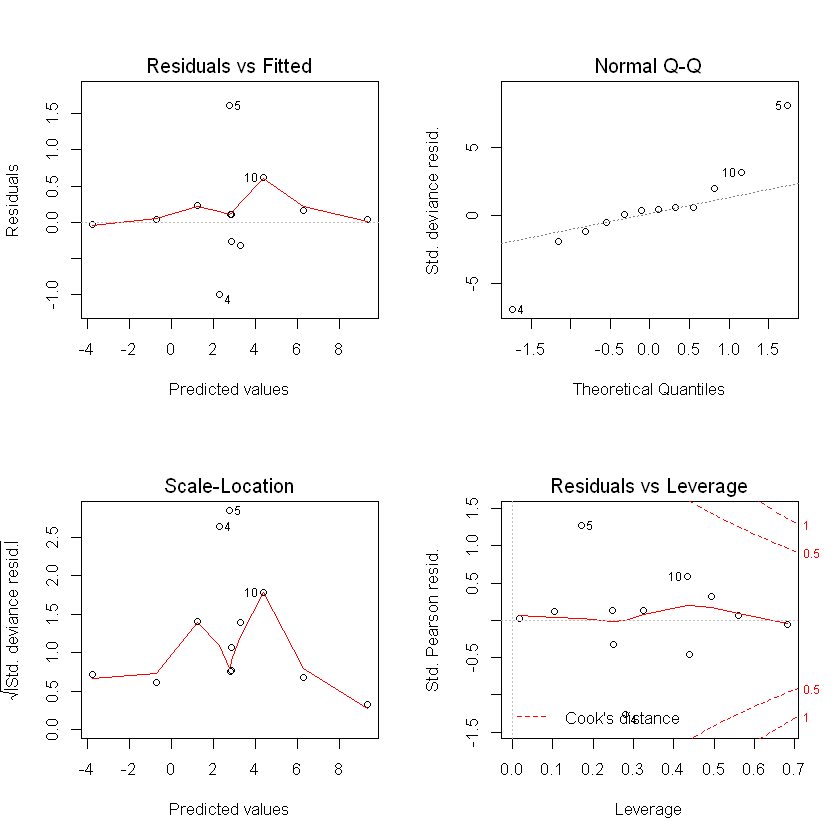

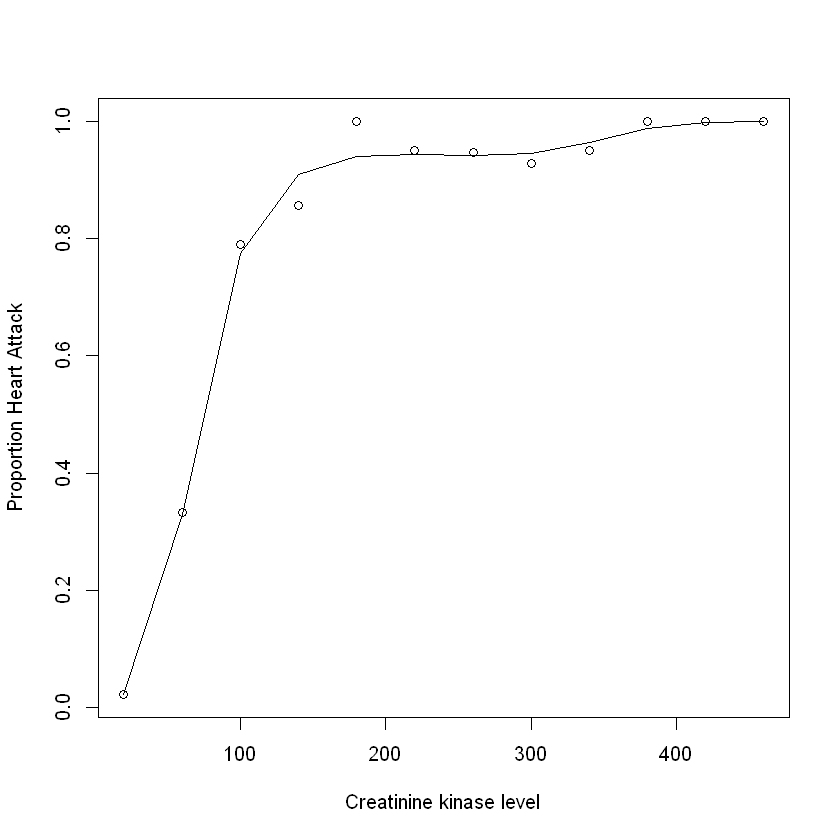

In [20]:
par(mfrow=c(2,2))
plot(mod.2)
par(mfrow=c(1,1))
plot(heart$ck,p,xlab="Creatinine kinase level",
ylab="Proportion Heart Attack")
lines(heart$ck,fitted(mod.2))


**The residual plots show less clear patterning than those of the first model, and the fit is closer to the observed data points.**

**To test whether mod.2 is indeed better than mod.0, we can perform an anova test. This naming is somewhat confusing, because really we are testing analysis of deviance, and not analysis of variance.**

In [21]:
anova(mod.0,mod.2,test="Chisq")


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
10,36.928623,NA,NA,NA
8,4.252454,2,32.67617,8.025278e-08


**The low p-value indicated strong evidence against the null hypothesis. So we reject the null hypothesis that neither model is significantly better than the other and conclude that model 2 is indeed more appropriate. This test is much more substantial than a simple comparison of individual deviance values from the two models.**